In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

%matplotlib inline
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\data_prep_functions.ipynb"
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\data_analysis_functions.ipynb"

#### <font color='darkorange'> Read the data (test runs below 15 seconds)

In [226]:
file_path = "C:/Users/anasofiaccruz/Desktop/Optogenetics processed data/below15_runs.csv"
below15 = pd.read_csv(file_path)

#### <font color='darkorange'> Remove baseline trials

In [227]:
below15 = below15[(below15['stim_condition']!=-1)]
below15['stim_condition'].unique()

array([1, 3, 0], dtype=int64)

#### <font color='darkorange'> Add session number

In [228]:
# Add session numbers to each session timestamp
below15= below15.groupby(['group', 'rat']).apply(add_session_nr).reset_index(drop=True)

#### <font color='darkorange'> BoxPlot the latency to choice point across sessions

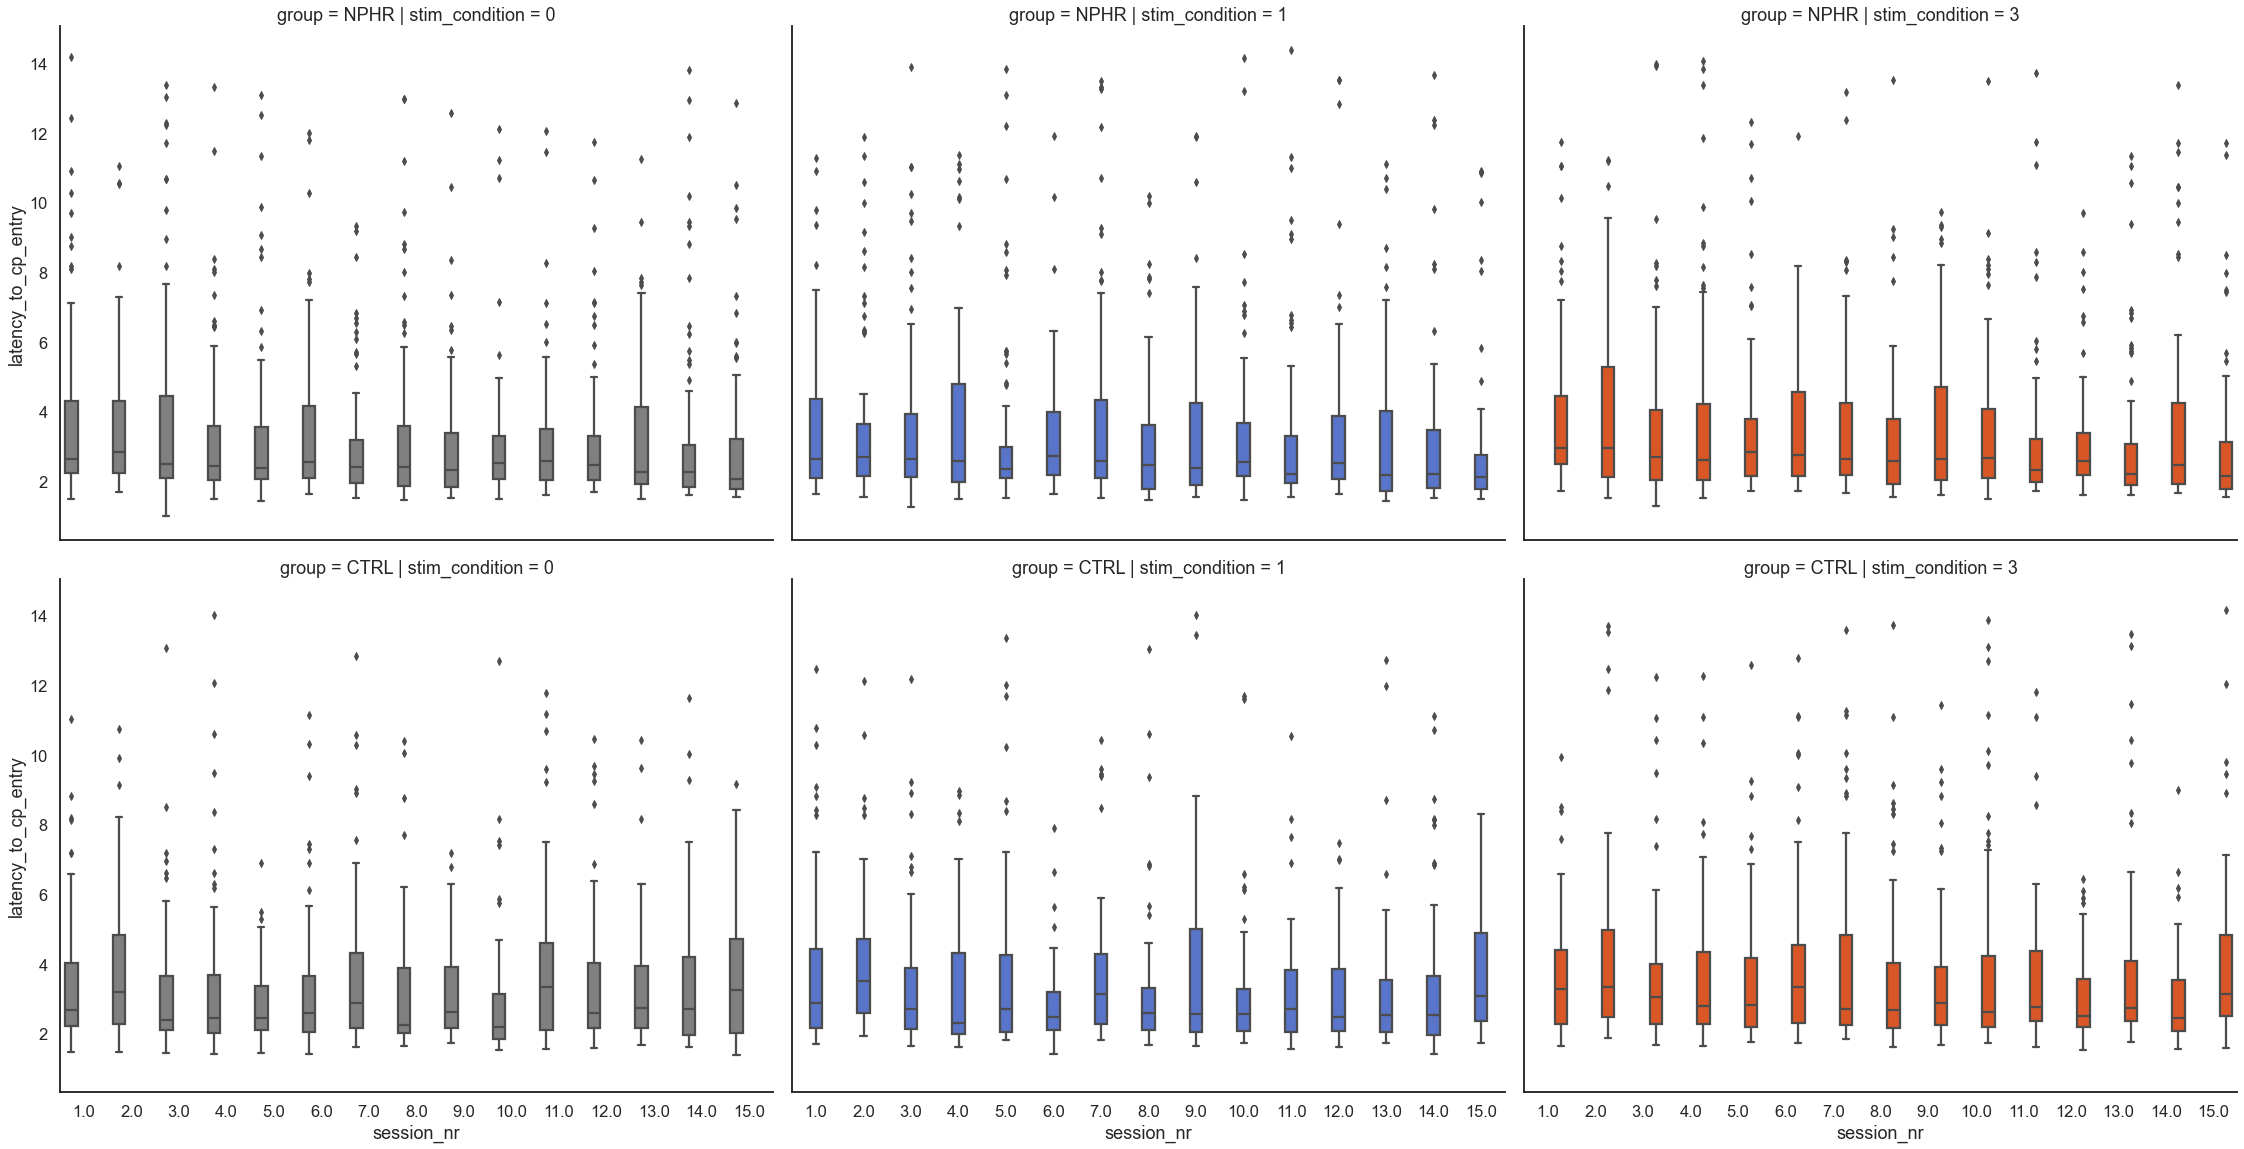

In [229]:
below15 = below15[below15['session_nr']<16]
sns.set(style='white', context='talk')
g = sns.catplot(kind='box', data=below15, col='stim_condition', row='group', x='session_nr',
                y='latency_to_cp_entry', hue='stim_condition', palette=['gray', 'royalblue', 'orangered'],
                height=8, aspect=1.3, saturation=.7)

#### <font color='darkorange'> Calculate the IQR values

In [230]:
iqr = below15.groupby(['group', 'stim_condition', 'session_nr', 'outcome']).apply(calculate_iqr,
                                                                                 'latency_to_cp_entry')

iqr_rats = below15.groupby(['group', 'rat', 'stim_condition', 'session_nr']).apply(calculate_iqr,
                                                                                 'latency_to_cp_entry')
iqr_rats = iqr_rats[iqr_rats['session_nr']<16]
iqr = iqr[iqr['session_nr']<16]
iqr.head(3)

,group,rat,outcome,stim_condition,session_nr,iqr_25,median,iqr_75,iqr
0,NPHR,NPHR1,1.0,1,1.0,2.117158,2.644749,4.562906,2.445747
1,NPHR,NPHR1,1.0,3,1.0,2.643334,2.943462,4.216992,1.573658
2,NPHR,NPHR1,0.0,3,1.0,2.141392,2.794394,5.092774,2.951382


#### <font color='darkorange'> Plot IQR and median across sessions

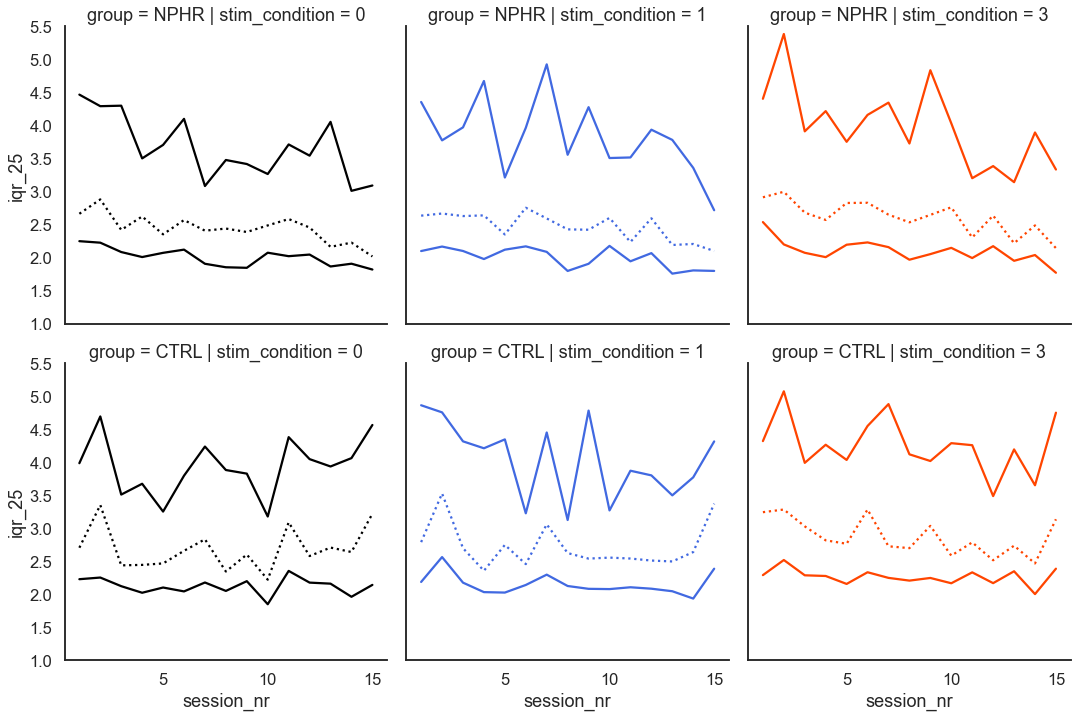

In [231]:
g = plot_iqr_and_median_across_sessions(iqr)

#### <font color='darkorange'> Individual median latencies across sessions 

('NPHR', 0)
('NPHR', 1)
('NPHR', 3)
('CTRL', 0)
('CTRL', 1)
('CTRL', 3)


<Figure size 1800x1200 with 0 Axes>

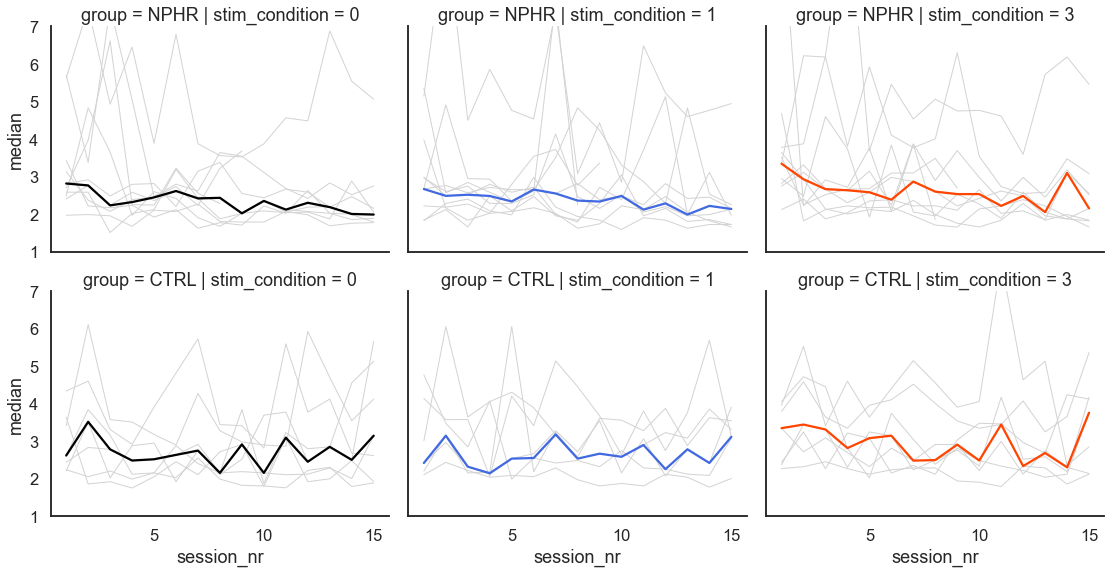

In [243]:
g = plot_individual_metrics_across_sessions(iqr_rats, 'median')
g.set(ylim=[1,7])

#### <font color='darkorange'> Individual IQR across sessions 

('NPHR', 0)
('NPHR', 1)
('NPHR', 3)
('CTRL', 0)
('CTRL', 1)
('CTRL', 3)


<Figure size 1800x1200 with 0 Axes>

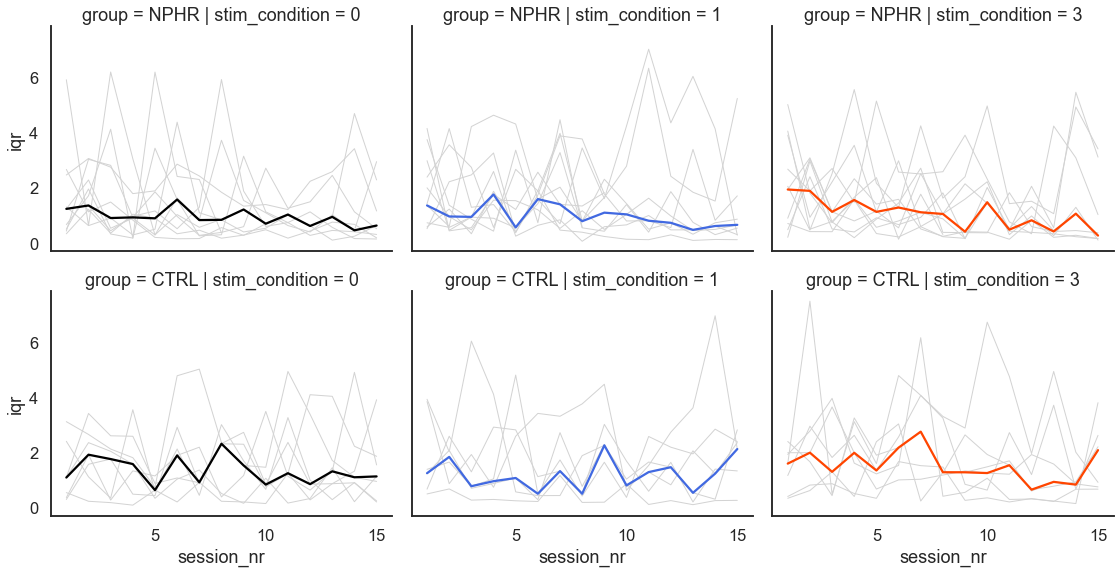

In [244]:
g = plot_individual_metrics_across_sessions(iqr_rats, 'iqr')

#### <font color='darkorange'> Inference testing using a mixed linear model

In [234]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#NPHR Test
df = below15[(below15['stim_condition']==3) & (below15['group']=='NPHR')]
md = smf.mixedlm("latency_to_cp_entry ~ session_nr", df, groups=df['rat'])
mdf = md.fit()
print(mdf.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: latency_to_cp_entry
No. Observations: 1149    Method:             REML               
No. Groups:       10      Scale:              4.4872             
Min. group size:  30      Log-Likelihood:     -2510.7120         
Max. group size:  145     Converged:          Yes                
Mean group size:  114.9                                          
-------------------------------------------------------------------
               Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
-------------------------------------------------------------------
Intercept       3.940      0.324   12.168   0.000    3.305    4.575
session_nr     -0.053      0.015   -3.535   0.000   -0.082   -0.024
Group Var       0.874      0.203                                   



In [235]:
#NPHR None
df = below15[(below15['stim_condition']==0) & (below15['group']=='NPHR')]
md = smf.mixedlm("latency_to_cp_entry ~ session_nr", df, groups=df['rat'])
mdf = md.fit()
print(mdf.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: latency_to_cp_entry
No. Observations: 1181    Method:             REML               
No. Groups:       10      Scale:              4.5490             
Min. group size:  32      Log-Likelihood:     -2588.0432         
Max. group size:  150     Converged:          Yes                
Mean group size:  118.1                                          
-------------------------------------------------------------------
               Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
-------------------------------------------------------------------
Intercept       3.730      0.316   11.823   0.000    3.112    4.349
session_nr     -0.043      0.015   -2.964   0.003   -0.072   -0.015
Group Var       0.827      0.192                                   



In [236]:
#NPHR, Sample
df = below15[(below15['stim_condition']==1) & (below15['group']=='NPHR')]
md = smf.mixedlm("latency_to_cp_entry ~ session_nr", df, groups=df['rat'])
mdf = md.fit()
print(mdf.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: latency_to_cp_entry
No. Observations: 1176    Method:             REML               
No. Groups:       10      Scale:              5.0105             
Min. group size:  32      Log-Likelihood:     -2633.1081         
Max. group size:  151     Converged:          Yes                
Mean group size:  117.6                                          
-------------------------------------------------------------------
               Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
-------------------------------------------------------------------
Intercept       3.760      0.308   12.196   0.000    3.155    4.364
session_nr     -0.036      0.015   -2.297   0.022   -0.066   -0.005
Group Var       0.763      0.170                                   



In [237]:
#CTRL None
df = below15[(below15['stim_condition']==0) & (below15['group']=='CTRL')]
md = smf.mixedlm("latency_to_cp_entry ~ session_nr", df, groups=df['rat'])
mdf = md.fit()
print(mdf.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: latency_to_cp_entry
No. Observations: 954     Method:             REML               
No. Groups:       7       Scale:              3.6837             
Min. group size:  117     Log-Likelihood:     -1988.9087         
Max. group size:  147     Converged:          Yes                
Mean group size:  136.3                                          
-------------------------------------------------------------------
                Coef.   Std.Err.     z      P>|z|   [0.025   0.975]
-------------------------------------------------------------------
Intercept       3.410      0.306   11.139   0.000    2.810    4.010
session_nr      0.002      0.014    0.154   0.877   -0.026    0.030
Group Var       0.535      0.170                                   



In [238]:
#CTRL Sample
df = below15[(below15['stim_condition']==1) & (below15['group']=='CTRL')]
md = smf.mixedlm("latency_to_cp_entry ~ session_nr", df, groups=df['rat'])
mdf = md.fit()
print(mdf.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: latency_to_cp_entry
No. Observations: 808     Method:             REML               
No. Groups:       6       Scale:              4.3137             
Min. group size:  115     Log-Likelihood:     -1748.1691         
Max. group size:  147     Converged:          Yes                
Mean group size:  134.7                                          
-------------------------------------------------------------------
               Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
-------------------------------------------------------------------
Intercept       3.823      0.339   11.284   0.000    3.159    4.487
session_nr     -0.033      0.017   -1.962   0.050   -0.066   -0.000
Group Var       0.550      0.178                                   



In [239]:
#CTRL Test
df = below15[(below15['stim_condition']==3) & (below15['group']=='CTRL')]
md = smf.mixedlm("latency_to_cp_entry ~ session_nr", df, groups=df['rat'])
mdf = md.fit()
print(mdf.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: latency_to_cp_entry
No. Observations: 937     Method:             REML               
No. Groups:       7       Scale:              5.0325             
Min. group size:  118     Log-Likelihood:     -2099.0489         
Max. group size:  147     Converged:          Yes                
Mean group size:  133.9                                          
-------------------------------------------------------------------
               Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
-------------------------------------------------------------------
Intercept       3.959      0.336   11.775   0.000    3.300    4.618
session_nr     -0.023      0.017   -1.326   0.185   -0.056    0.011
Group Var       0.624      0.171                                   



#### <font color='darkorange'> Comparing first and last n session distributions in each condition

In [240]:
below15.loc[:, 'first_last']=np.nan
below15.loc[below15['session_nr'].between(1,5), 'first_last']=0
below15.loc[below15['session_nr'].between(11, 15), 'first_last']=1

<Figure size 1800x1200 with 0 Axes>

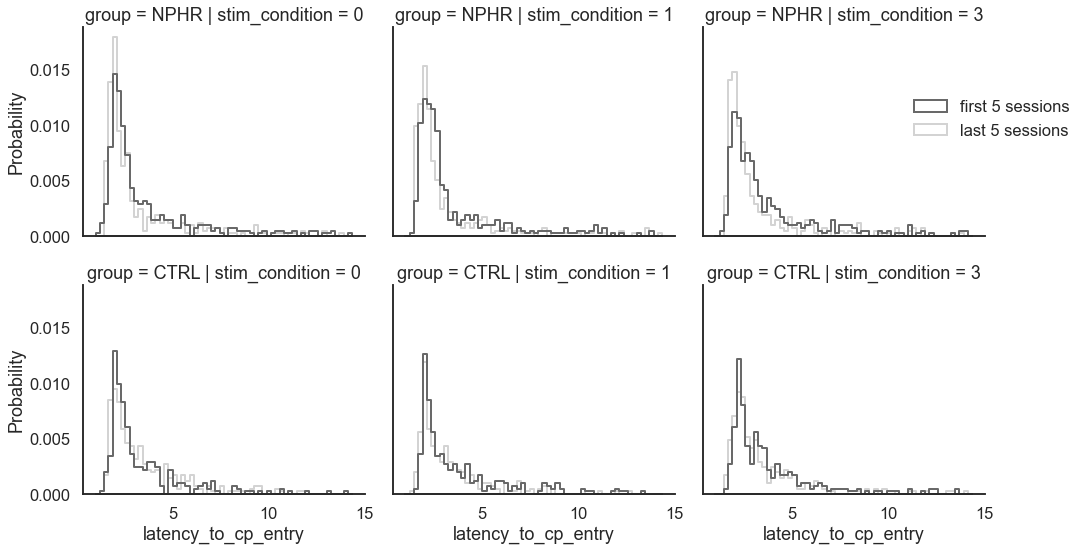

In [241]:
sns.set(style='white', context='talk')
plt.figure(dpi=300)

g = sns.displot(kind='hist', data=below15, 
                col='stim_condition', row='group',
                x='latency_to_cp_entry', stat='probability', 
                hue=below15['first_last'].map({0:'first 5 sessions ', 1:'last 5 sessions '}), 
                element='step', palette=['dimgray','lightgrey'], 
                bins=60, alpha=0, height=4, aspect=1.2, linewidth=2)

axes = g.axes.flatten()
g._legend.set(bbox_to_anchor=(.9,.75), title='')
sns.despine()

<Figure size 1800x1200 with 0 Axes>

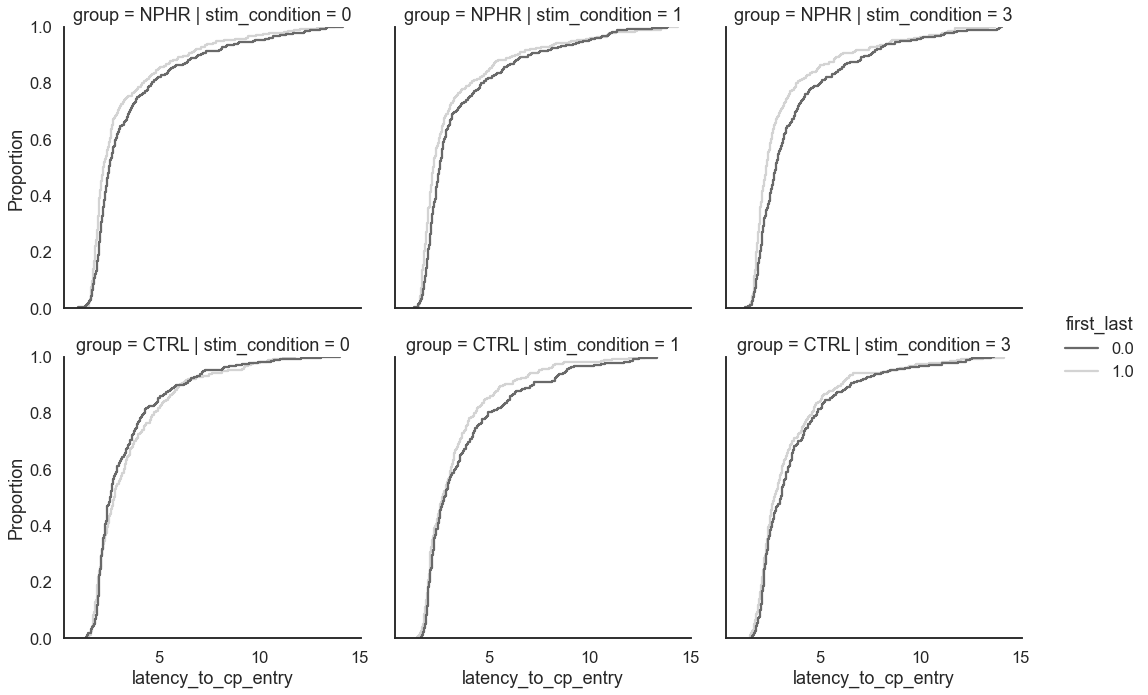

In [242]:
sns.set(style='white', context='talk')
plt.figure(dpi=300)
g = sns.displot(kind='ecdf', data=below15, col='stim_condition' , row='group',
                x='latency_to_cp_entry', stat='proportion', hue='first_last', 
                palette=['dimgray','lightgray'])

axes = g.axes.flatten()
#axes[0].set(title="NpHR-", xlabel='Latency (s)', xticks=range(0,20,5), xticklabels=range(0,20,5))
#axes[1].set(title="NpHR+", xlabel='Latency (s)', xticks=range(0,20,5), xticklabels=range(0,20,5))
sns.despine()